# Задача классификации. Алгоритм KNN

### Опросы к лекции

#### Опрос 1
Пусть даны две точки $x=\left(1, 3, -5, 7\right)$ и $x'=\left(2, -4, 0, 8\right)$. Вычислить евклидово расстояние $d_E$ между $x$ и $x'$.
Напомним, что евклидово расстояние вычисляется как квадратный корень из суммы квадратов разностей соответствующих координат:
$$
d_{E}\left(x, x'\right)=\sqrt{\left(1-2\right)^{2}+\left(3-(-4)\right)^{2}+\left(-5-0\right)^{2}+ \left(7-8\right)^{2} }
$$

In [ ]:
import numpy as np

# Задаем оба вектора как массивы numpy

x = np.array([1,3,-5,7])
x_prime = np.array([2,-4,0,8])


# Функция для нахождения евклидова расстояния
def eucl_dist(x,x_prime):
  dist = 0
  for coord_1, coord_2 in zip(x,x_prime):
    dist += (coord_1 - coord_2) ** 2
  return dist ** 0.5

eucl_dist(x,x_prime)

8.717797887081348

In [ ]:
# То же самое, но с помощью библиотеки

from scipy.spatial import distance
distance.euclidean(x, x_prime)

8.717797887081348

Манхэттенское расстояние вычисляется следующим образом:
$$
d_{1}\left(x, x'\right)=\left|1-2\right|+\left|3-(-4)\right|+\left|-5-0\right|+ \left|7-8\right|
$$

In [ ]:
# Теперь берем сумму из модулей разностей

def manh_dist(x,x_prime):
  dist = 0
  for coord_1, coord_2 in zip(x,x_prime):
    dist += abs(coord_1 - coord_2)
  return dist

manh_dist(x,x_prime)

14

In [ ]:
# То же самое, но с помощью библиотеки
distance.cityblock(x, x_prime)

14

Расстояние Чебышева вычисляется так:
$$
d_{\infty}\left(x, x'\right)=\max \left (\left|1-2\right|, \left|3-(-4)\right|,\left|-5-0\right|, \left|7-8\right| \right)
$$

In [ ]:
# Теперь берем максимум из модулей разностей

def cheb_dist(x,x_prime):
  dist = []
  for coord_1, coord_2 in zip(x,x_prime):
    dist.append(abs(coord_1 - coord_2))
  return max(dist)

cheb_dist(x,x_prime)

7

In [ ]:
# То же самое, но с помощью библиотеки
distance.chebyshev(x, x_prime)

7

#### Опрос 2

Приведена таблица некоторых синтетических данных. Вы должны классифицировать новый объект с помощью метода $k$-ближайший соседей.
\begin{array}{|c|c|c|c|} \hline
id & X & Y & Class \\ \hline
1&	28&	10&	1 \\ \hline
2&	49&	49&	1 \\ \hline
3&48&	35&	0 \\ \hline
4&	36&	33&	1 \\ \hline
5&	45&	54&	0 \\ \hline
\end{array}

Новый объект имеет координаты
$$
(33,47).
$$


In [ ]:
# Создадим датафрейм на основе текста в формате csv
import pandas as pd
import io

data = """id,X,Y,Class
1,28,10,1
2,49,49,1
3,48,35,0
4,36,33,1
5,45,54,0"""
df = pd.read_csv(io.StringIO(data), sep=",", index_col='id')
df.iloc[:,:2]

,X,Y
id,,
1,28,10
2,49,49
3,48,35
4,36,33
5,45,54


In [ ]:
# Наш тестовый объект
x = np.array([33,47])
# Определяем евклидово расстояние от тестового объекта до каждого объекта в наборе данных
df['Euclidean'] = [distance.euclidean(obj, x) for index, obj in df.iloc[:,:2].iterrows()]
df

,X,Y,Class,Euclidean
id,,,,
1,28,10,1,37.336309
2,49,49,1,16.124515
3,48,35,0,19.209373
4,36,33,1,14.317821
5,45,54,0,13.892444


In [ ]:
# Аналогично вычисляем манхэттенское расстояние и расстояние чебышева
df['Manhattan'] = [distance.cityblock(obj, x) for index, obj in df.iloc[:,:2].iterrows()]
df['Chebyshev'] = [distance.chebyshev(obj, x) for index, obj in df.iloc[:,:2].iterrows()]
df

,X,Y,Class,Euclidean,Manhattan,Chebyshev
id,,,,,,
1,28,10,1,37.336309,42,37
2,49,49,1,16.124515,18,16
3,48,35,0,19.209373,27,15
4,36,33,1,14.317821,17,14
5,45,54,0,13.892444,19,12


In [ ]:
# Выделим наименьшие расстояния относительно каждой метрики

df.style.highlight_min(['Euclidean', 'Manhattan', 'Chebyshev'], color = 'darkgreen', axis = 0)

,X,Y,Class,Euclidean,Manhattan,Chebyshev
id,,,,,,
1,28,10,1,37.336309,42,37
2,49,49,1,16.124515,18,16
3,48,35,0,19.209373,27,15
4,36,33,1,14.317821,17,14
5,45,54,0,13.892444,19,12


#### Опрос 3

Веса $\omega_i$ обратно пропорциональны квадрату расстояния между объектами. Используйте евклидову метрику.

In [ ]:
df['Weighted'] = 1/df.Euclidean**2
df

,X,Y,Class,Euclidean,Manhattan,Chebyshev,Weighted
id,,,,,,,
1,28,10,1,37.336309,42,37,0.000717
2,49,49,1,16.124515,18,16,0.003846
3,48,35,0,19.209373,27,15,0.002710
4,36,33,1,14.317821,17,14,0.004878
5,45,54,0,13.892444,19,12,0.005181


In [ ]:
#Сумма взвешенных расстояний до объектов класса 0
df[df['Class'] == 0].Weighted.sum()

0.007891374250530072

In [ ]:
#Сумма взвешенных расстояний до объектов класса 1
df[df['Class'] == 1].Weighted.sum()

0.00944156274141927

### Индивидуальное задание

In [ ]:
import pandas as pd
link = 'https://courses.openedu.ru/assets/courseware/v1/c2b01448f868b815131dbbf859402fc6/asset-v1:ITMOUniversity+DATANTECH2035+cifru_2035+type@asset+block/Task_data.csv'
train_data = pd.read_csv(link, delimiter=',', index_col='id')
train_data

,X,Y,Class
id,,,
1,28,10,1
2,49,49,1
3,48,35,0
4,36,33,1
5,45,53,0
6,36,10,0
7,62,40,0
8,13,47,1
9,40,56,0


Отбор данных для предикторов, удаление столбца Class

In [ ]:
X = train_data.drop(['Class'], axis=1)

Отбор столбца Class для отклика

In [ ]:
y = train_data[['Class']].values.ravel()

Подключение библиотеки и задание параметров модели:

*    `n_neighbors` — число соседей;
*   `p` — используемое расстояние.

Манхэттенское расстояние — `p=1`, евклидово расстояние — `p=2`. [Дополнительные параметры](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем объект класса KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3, p = 2)

# Обучаем классификатор на тренировочных данных
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)


Новый объект, который необходимо классифицировать

In [ ]:
import numpy as np

NewObject = np.array([5, -4])

Назначенный класс:

In [ ]:
neigh.predict([NewObject])

array([1])

Вероятности отнесения к классам 0 и 1 соответственно:

In [ ]:
neigh.predict_proba([NewObject])

array([[0.33333333, 0.66666667]])

Вывод расстояний до 𝑘 соседей в порядке удаления (первый массив — расстояния, второй — идентификаторы объектов). Обращаем внимание, что метод возвращает индексы ближайших соседей с нуля, что не соответствует индексации в таблице.

In [ ]:
neigh.kneighbors([NewObject])

(array([[26.92582404, 34.0147027 , 48.27007354]]), array([[0, 5, 3]]))

Получены индексы `[0, 5, 3]`, значит `id = [1, 6, 4]`

Визуализируем полученные результаты

Text(4, -2, 'NewObject')

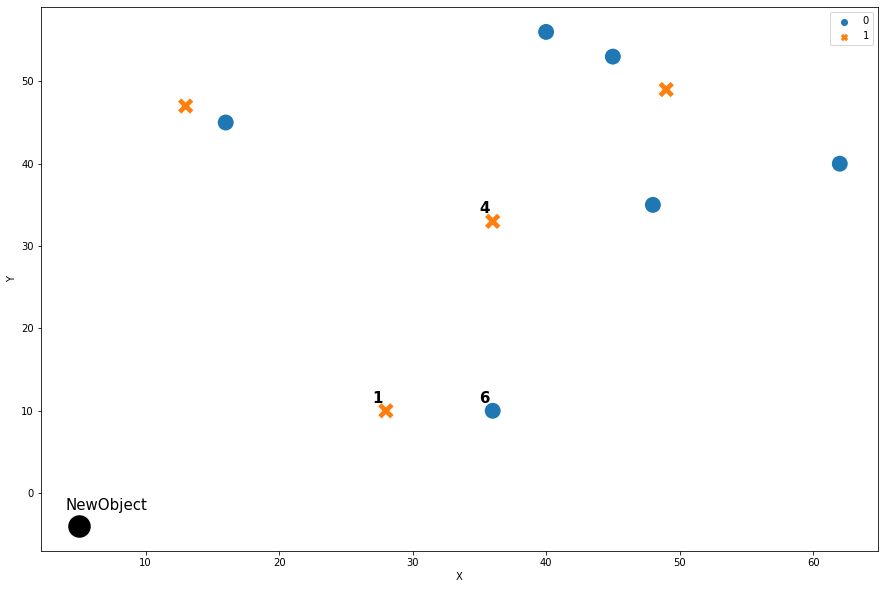

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# Установим размер изображения
plt.rcParams["figure.figsize"] = (15,10)


# Строим тренировочные данные
sns.scatterplot(train_data.X, train_data.Y, style = train_data.Class, hue=train_data.Class, s=300)
# Строим тестовый объект
sns.scatterplot([NewObject[0]], [NewObject[1]], marker='o', s=600, color='black')

# Добавляем аннотации (id объекта) для ближайших соседей
for i in neigh.kneighbors([NewObject])[1].ravel():
    plt.annotate(str(i+1), (train_data.X.iloc[i], train_data.Y.iloc[i]), xytext = (train_data.X.iloc[i]-1, train_data.Y.iloc[i]+1), fontsize=15, weight='bold')
# Добавляем аннотацию для тестового объекта
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext = (NewObject[0]-1, NewObject[1]+2), fontsize=15)